In [154]:
from IPython.display import HTML

HTML('''
    <script>
        code_show=true; 
        function code_toggle() {
            if (code_show){
                $('div.input').hide();
                $('button#code-toggle').text('Show Code');
            } else {
                $('div.input').show();
                $('button#code-toggle').text('Hide Code');
            }
            code_show = !code_show
        }
    </script>

    <button id="code-toggle" onclick="javascript:code_toggle()">
        Hide Code
    </button>
''')

# Challenge: Preparing a dataset for modeling

Dataset from [Kaggle](https://www.kaggle.com/c/titanic)

This dataset contains information for passengers on the Titanic's tragic maiden journey on April 15, 1912. The sinking killed 1502 out of 2224 passengers and crew. The dataset contains 891 entries (i.e. passengers) with 12 different columns: `PassengerId`, `Survived`, `Pclass` (class of ticket), `Name`, `Sex`, `Age`, `SibSp` (# of sublings and spouses on board), `Parch` (# of parents and children on board), `Ticket` (ticket number), `Fare`, `Cabin`, and `Embarked` (port of embarkation).

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./titanic/train.csv')
print(df.columns, df.shape)
df.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Outcome and Feature Variables

Choose an outcome variable and 4-5 other variables (1-2 categorical, 3-4 continuous) to act as the basis for features

My outcome variable would be `Survived`, which denotes whether the passenger survived or not.

The continuous variables I would use as a basis for features would be `Age`, `Fare`, and `Parch`. The categorical variables I would use would be `Pclass` and `Sex`. My reasoning is that these attributes would best help predict whether a passenger survived or not. 

## Exploring the data: Univariate

This dataset has 891 datapoints, with 12 possible attribute values (columns). 

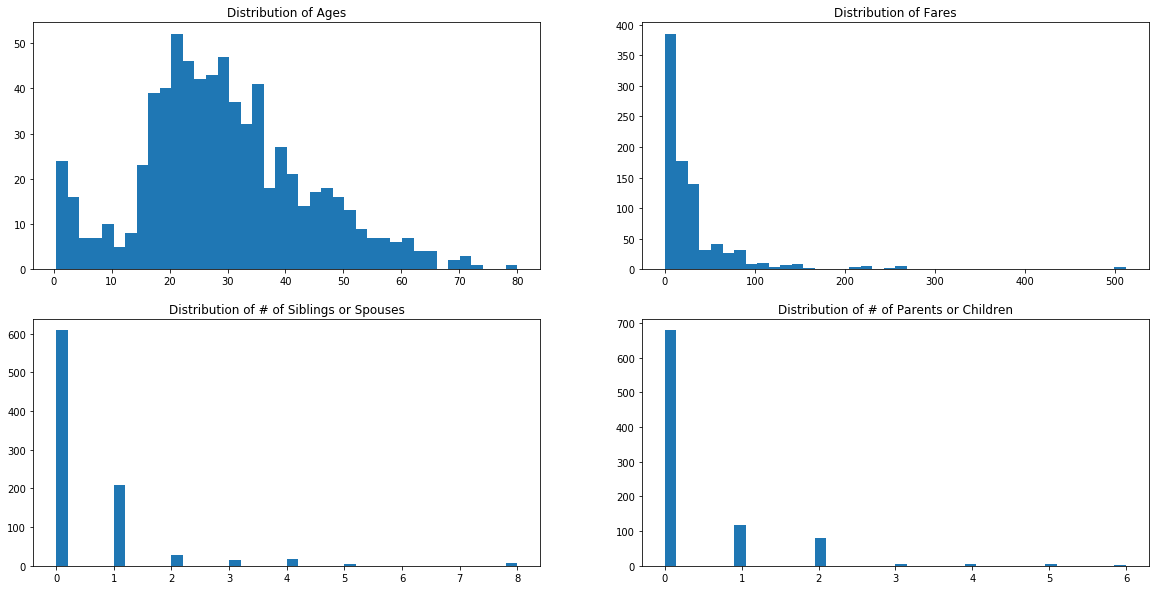

In [78]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
non_null_ages = df[pd.notnull(df['Age'])]['Age']
plt.hist(non_null_ages, bins=40)
plt.title('Distribution of Ages')

plt.subplot(2, 2, 2)
non_null_fares = df[pd.notnull(df['Fare'])]['Fare']
plt.hist(non_null_fares, bins=40)
plt.title('Distribution of Fares')

plt.subplot(2, 2, 3)
non_null_sibsp = df[pd.notnull(df['SibSp'])]['SibSp']
plt.hist(non_null_sibsp, bins=40)
plt.title('Distribution of # of Siblings or Spouses')

plt.subplot(2, 2, 4)
non_null_parch = df[pd.notnull(df['Parch'])]['Parch']
plt.hist(non_null_parch, bins=40)
plt.title('Distribution of # of Parents or Children')

plt.show()

In [77]:
non_null_pclass = df[pd.notnull(df['Pclass'])]['Pclass']
non_null_sex = df[pd.notnull(df['Sex'])]['Sex']

print('Age:\n {} null values\n variance: {}'.format(df.shape[0] - non_null_ages.shape[0], non_null_ages.var()))
print('Fare:\n {} null values\n variance: {}'.format(df.shape[0] - non_null_fares.shape[0], non_null_fares.var()))
print('SibSp:\n {} null values\n variance: {}'.format(df.shape[0] - non_null_sibsp.shape[0], non_null_sibsp.var()))
print('Parch:\n {} null values\n variance: {}'.format(df.shape[0] - non_null_parch.shape[0], non_null_parch.var()))
print('Pclass:\n {} null values'.format(df.shape[0] - non_null_pclass.shape[0]))
print('Sex:\n {} null values'.format(df.shape[0] - non_null_sex.shape[0]))

Age:
 177 null values
 variance: 211.0191247463081
Fare:
 0 null values
 variance: 2469.436845743117
SibSp:
 0 null values
 variance: 1.2160430774662894
Parch:
 0 null values
 variance: 0.6497282437357467
Pclass:
 0 null values
Sex:
 0 null values


## Exploring the data: Bivariate
Next, examine the pairwise relationships among your data.

### Continuous Variables
The scatterplot represents the relationship between two continuous variables. For this sort of wide-scale dataset investigation, we can go a step further and create a scatterplot matrix that shows all the bivariate relationships in one plot made up of subplots.

The correlation coefficient r is a numeric representation of the linear relationship between two continuous variables. Correlations range from -1 (as values in one variable go up, values in the other go down) to 0 (no relationship between the variables) to 1 (as values in one variable go up, values in the other go up as well).
Look for: two-dimensional outliers that represent unusual combinations of values

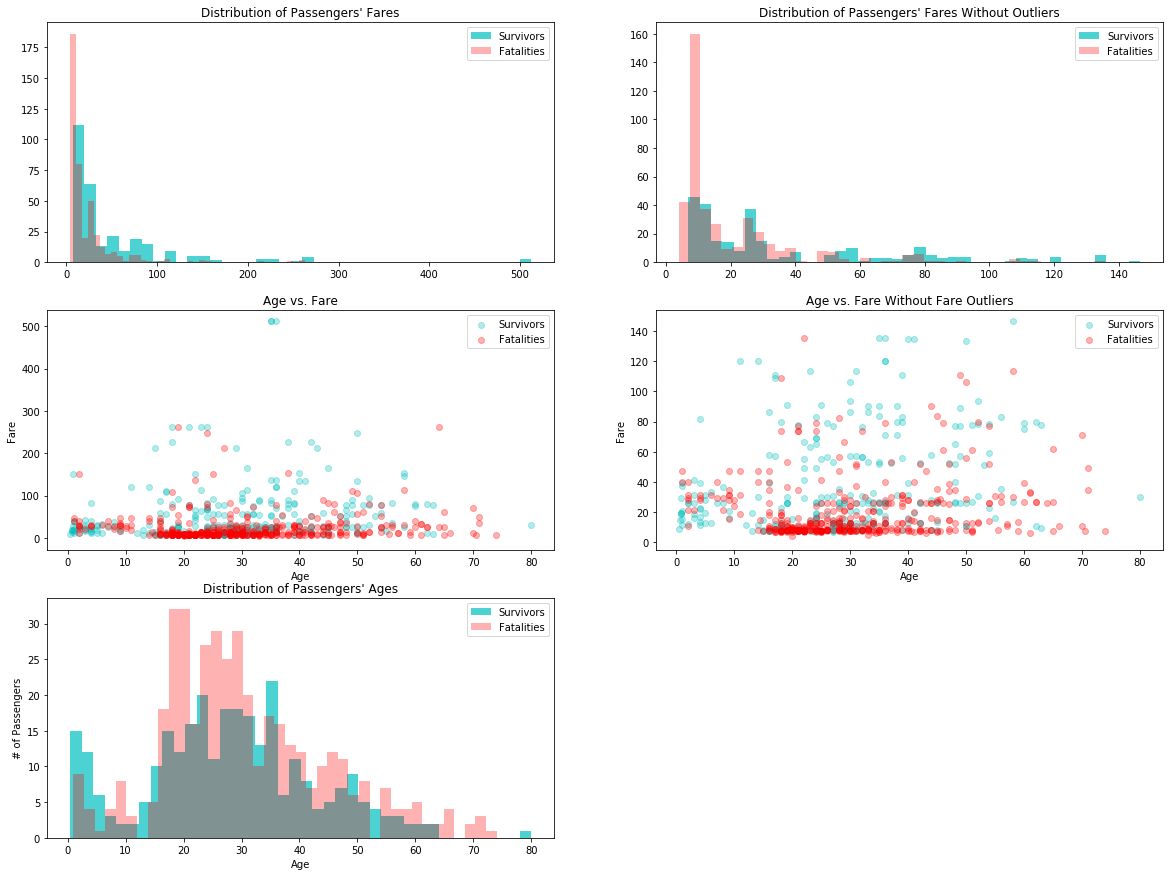

In [152]:
survivors = df[df['Survived'] == 1]
survivors = survivors[pd.notnull(survivors['Age'])]
survivors = survivors[survivors['Fare'] > 0]

fatalities = df[df['Survived'] == 0]
fatalities = fatalities[pd.notnull(fatalities['Age'])]
fatalities = fatalities[fatalities['Fare'] > 0]

survivors_without_outliers = survivors[survivors['Fare'] <= 150]
fatalities_without_outliers = fatalities[fatalities['Fare'] <= 150]

plt.figure(figsize=(20,15))

plt.subplot(3, 2, 1)
plt.hist(survivors['Fare'], bins=40, color='c', alpha=0.7)
plt.hist(fatalities['Fare'], bins=40, color='red', alpha=0.3)
plt.title('Distribution of Passengers\' Fares')
plt.legend(['Survivors', 'Fatalities'])

plt.subplot(3, 2, 2)
plt.hist(survivors_without_outliers['Fare'], bins=40, color='c', alpha=0.7)
plt.hist(fatalities_without_outliers['Fare'], bins=40, color='red', alpha=0.3)
plt.title('Distribution of Passengers\' Fares Without Outliers')
plt.legend(['Survivors', 'Fatalities'])

plt.subplot(3, 2, 3)
plt.scatter(survivors['Age'], survivors['Fare'], color='c', alpha=0.3)
plt.scatter(fatalities['Age'], fatalities['Fare'], color='red', alpha=0.3)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.legend(['Survivors', 'Fatalities'])

plt.subplot(3, 2, 4)
plt.scatter(survivors_without_outliers['Age'], survivors_without_outliers['Fare'], color='c', alpha=0.3)
plt.scatter(fatalities_without_outliers['Age'], fatalities_without_outliers['Fare'], color='red', alpha=0.3)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare Without Fare Outliers')
plt.legend(['Survivors', 'Fatalities'])

plt.subplot(3, 2, 5)
plt.hist(survivors['Age'], bins=40, color='c', alpha=0.7)
plt.hist(fatalities['Age'], bins=40, color='red', alpha=0.3)
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.title('Distribution of Passengers\' Ages')
plt.legend(['Survivors', 'Fatalities'])

plt.show()

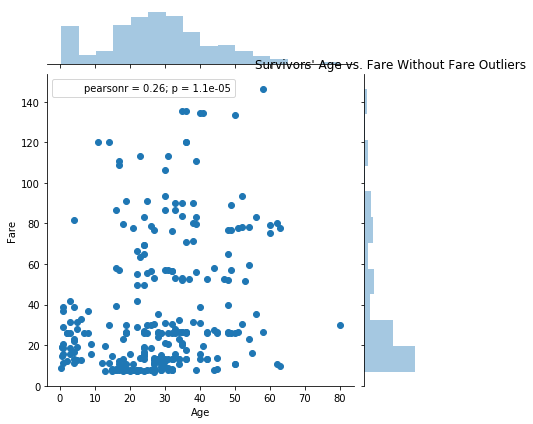

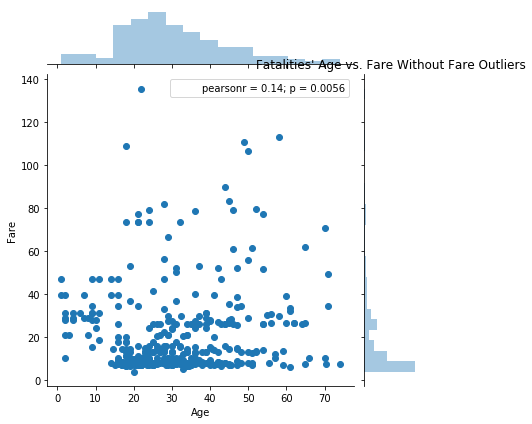

In [161]:
sns.jointplot(x="Age", y="Fare", data=survivors_without_outliers)
plt.title('Survivors\' Age vs. Fare Without Fare Outliers')

sns.jointplot(x="Age", y="Fare", data=fatalities_without_outliers)
plt.title('Fatalities\' Age vs. Fare Without Fare Outliers')

plt.show()

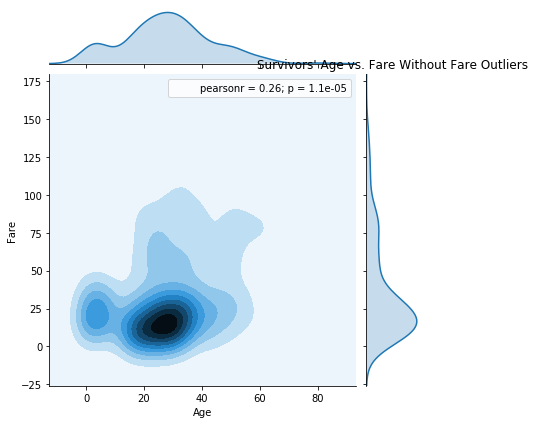

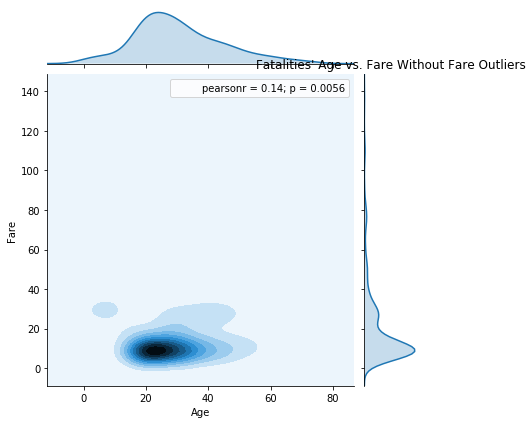

In [162]:
sns.jointplot(x="Age", y="Fare", data=survivors_without_outliers, kind="kde")
plt.title('Survivors\' Age vs. Fare Without Fare Outliers')

sns.jointplot(x="Age", y="Fare", data=fatalities_without_outliers, kind="kde")
plt.title('Fatalities\' Age vs. Fare Without Fare Outliers')

plt.show()

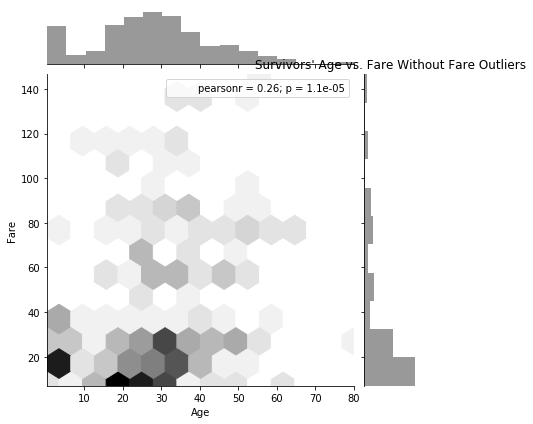

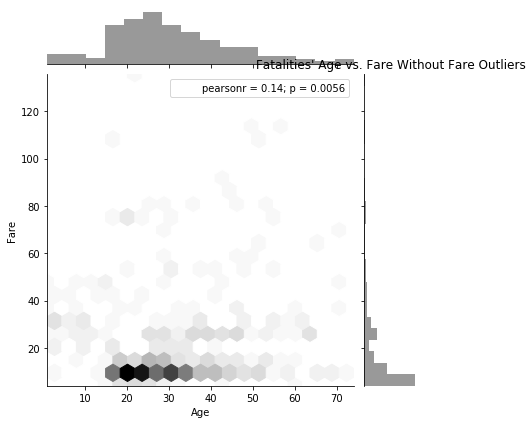

In [164]:
sns.jointplot(x="Age", y="Fare", data=survivors_without_outliers, kind="hex", color="k")
plt.title('Survivors\' Age vs. Fare Without Fare Outliers')

sns.jointplot(x="Age", y="Fare", data=fatalities_without_outliers, kind="hex", color="k")
plt.title('Fatalities\' Age vs. Fare Without Fare Outliers')

plt.show()

### Continuous vs. Categorical Variables
Box, violin, or similar plots estimate the value of the continuous variable for each value of the categorical variable.
Descriptive statistics, including estimates of central tendency and variance, for the continuous variable at each level of the categorical variable.
T-tests and ANOVA
Look for: Outliers in each group, very small groups

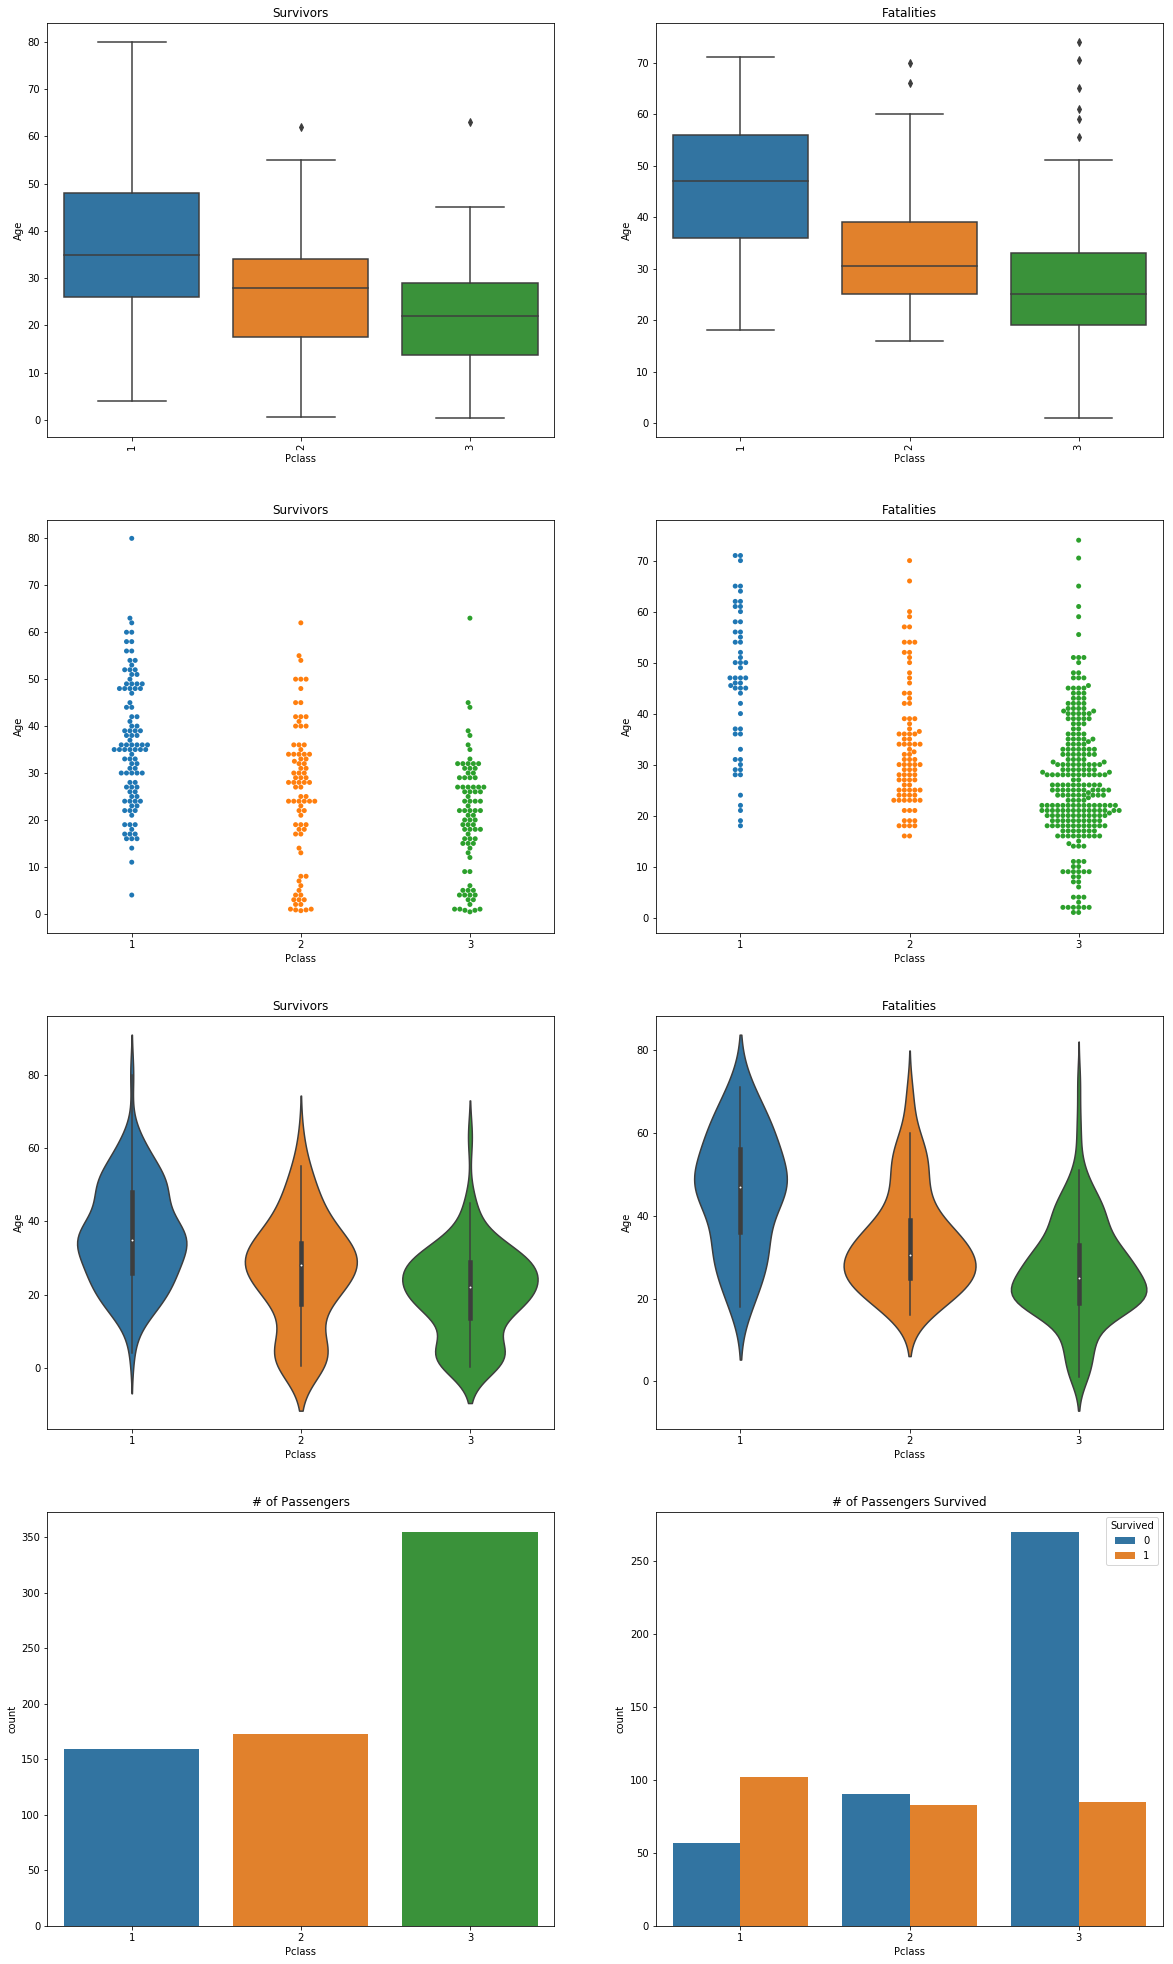

In [189]:
data_non_null = df[pd.notnull(df['Age'])]
data_non_null = data_non_null[data_non_null['Fare'] <= 150]
# data_without_outliers = data_without_outliers[data_without_outliers['Fare'] <= 150]

figure = plt.figure(figsize=(20,35))

figure.add_subplot(3, 2, 1)
plt.title('Survivors')
plt.xticks(rotation=90)
sns.boxplot(x="Pclass", y="Age", data=survivors_without_outliers, dodge=False)

figure.add_subplot(3, 2, 2)
plt.title('Fatalities')
plt.xticks(rotation=90)
sns.boxplot(x="Pclass", y="Age", data=fatalities_without_outliers, dodge=False)

figure.add_subplot(3, 2, 3)
plt.title('Survivors')
sns.swarmplot(x="Pclass", y="Age", data=survivors_without_outliers)

figure.add_subplot(3, 2, 4)
plt.title('Fatalities')
sns.swarmplot(x="Pclass", y="Age", data=fatalities_without_outliers)

figure.add_subplot(3, 2, 5)
plt.title('Survivors')
sns.violinplot(x="Pclass", y="Age", data=survivors_without_outliers)

figure.add_subplot(3, 2, 6)
plt.title('Fatalities')
sns.violinplot(x="Pclass", y="Age", data=fatalities_without_outliers)

plt.show()

### Categorical Variables
A barplot, with the height of each bar indicating the number of datapoints in each combination of levels of the two variables
A table of counts, giving the number of datapoints for each combination of levels of the two variables
Chi-square tests that indicate whether one combination of levels is significantly smaller or larger than the rest.
Look for: Subgroups with very small counts relative to the other subgroups

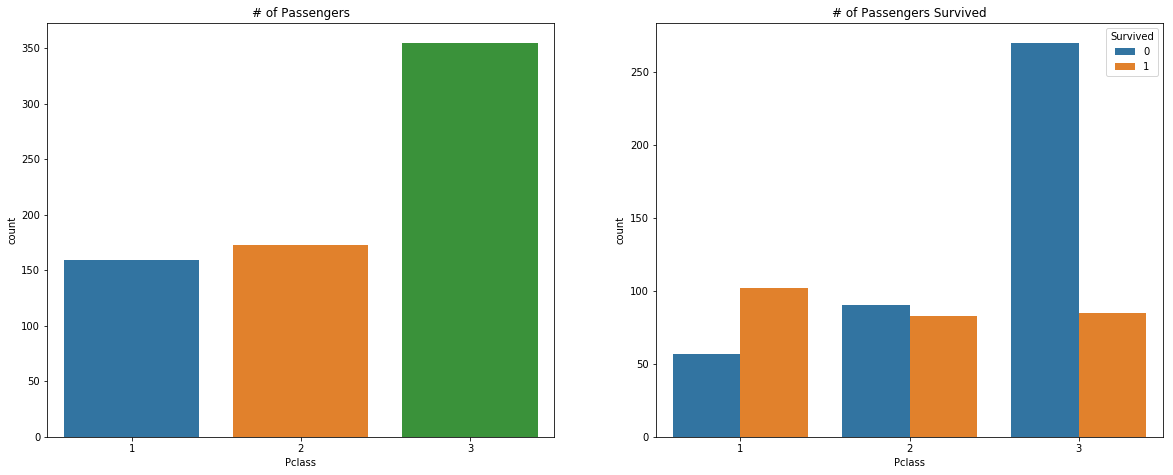

Survived    0    1
Pclass            
1          57  102
2          90   83
3         270   85


In [193]:
figure = plt.figure(figsize=(20,35))

figure.add_subplot(4, 2, 7)
plt.title('# of Passengers')
sns.countplot(x="Pclass", data=data_non_null)

figure.add_subplot(4, 2, 8)
plt.title('# of Passengers Survived')
sns.countplot(x="Pclass", hue="Survived", data=data_non_null)

plt.show()

counttable = pd.crosstab(data_non_null['Pclass'], data_non_null['Survived'])
print(counttable)

## Creating features

1. Age Group – 'Child' (0-18), 'Young Adult' (19-35), 'Middle-Aged Adult' (36-55), 'Older Adult' (56+)

2. First Name – 

3. Last Name –

4. Spouse Name –

5. With Spouse – True or False if spouse is on Titanic

6. Siblings – Total # of siblings

7. Parents – Total # of parents

8. Children – Total # of children

9. Cabin Section – Letter for Cabin (e.g. C for cabin C123)

10. Cabin Number – Number for Cabin (e.g. 123 for cabin C123)


Justify your choices. (WANT FEEDBACK FIRST)

OTHER OPTIONS:
0. Combinations of Age-Sex-Class
0. Children Without Parents – 
0. Older Adults Without Children – 
0. Women Without Family (Excluding Children) – 
0. Came With Family – True or False (True if SibSp > 0 or Parch > 0)
0. Family Members – Total # of siblings, spouses, parents, and children